In [46]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# Specify dtype option on import or set low_memory=False.
pd.options.mode.chained_assignment = None  # default='warn'

import math
import scipy

# Datviz purposes
import matplotlib.pyplot as plt
plt.style.use('bmh')
import seaborn as sns
sns.set_style('darkgrid')
import plotly.express as px

In [47]:
try :
    train_data = pd.read_csv("/kaggle/input/penyisihan-joints-data-competition-2023/train.csv", low_memory=False)
    test_data = pd.read_csv("/kaggle/input/penyisihan-joints-data-competition-2023/test.csv", low_memory=False) # For Kaggle

except :
    train_data = pd.read_csv("datasets/train.csv", low_memory=False)
    test_data = pd.read_csv("datasets/test.csv", low_memory=False) # For local development

In [48]:
# Print all unique values in each column
for col in test_data.columns:
    print(col, test_data[col].unique())

id [     0      1      2 ... 242079 242080 242081]
floors_before_eq (total) ['2' '3.00' 'Floor-three' 'floor second' ' just 2 floor' 'Two Floor'
 ' has 3 Floor' 'There is 2 Floor/Story' 'two' 'Floor two' '2 floor'
 'Floor 1' 'three Story' 'two story' 'floor 1st' 'Floor 2' 'one story'
 'Three' 'floor one' 'five Floor' 'floor third' 'floor two' 'Floor 3' '1'
 'one' 'Three floor' 'Has 1 floor' 'Just 1 floor' '1st Story' 'Floor 4'
 'Four Story' 'Fl Five' ' has Four fl' '5' 'four Floor' 'Four' '6' '4'
 'floor four' ' Has Five fl' 'fifth' 'Fl four' 'Floor Fifth' '7' '9']
old_building [  7  13  40  25   5   6  10  17  31  18  44   2  15  16  12  30   3 999
  21   4  11   9  22  35  23  20  27   1   8  14  47  34  42  50 100  19
  32  33  64  28  60  45   0  29  70  26  38  41  39  54  24  37  80  43
  36  56  58  55  62 200  76  68  51  48  78  99  46  82  90  65 110 140
  52  75  63  57  85  83  81  61  53 114  71  95  72 102  94  69  74  73
  49 120 123  66  59 150 125  86  67 103  79 115  

In [49]:
train_data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [50]:
train_data.head(1).transpose()

,0
floors_before_eq (total),floor two
old_building,1.0
plinth_area (ft^2),256 ft^2
height_before_eq (ft),22.0
land_surface_condition,Flat
type_of_foundation,Bamboo or Timber
type_of_roof,Bamboo/Timber Light roof
type_of_ground_floor,Clay
type_of_other_floor,TImber/Bamboo-Mud
position,Not attached


In [51]:
print("Train data shape: ", train_data.shape)
print("Test data shape: ", test_data.shape)

Train data shape:  (722815, 24)
Test data shape:  (242082, 24)


In [52]:
print("Train data columns: ", train_data.columns, "\n\n")
print("Test data columns: ", test_data.columns)

Train data columns:  Index(['floors_before_eq (total)', 'old_building', 'plinth_area (ft^2)',
       'height_before_eq (ft)', 'land_surface_condition', 'type_of_foundation',
       'type_of_roof', 'type_of_ground_floor', 'type_of_other_floor',
       'position', 'building_plan_configuration',
       'technical_solution_proposed', 'legal_ownership_status',
       'has_secondary_use', 'type_of_reinforcement_concrete',
       'residential_type', 'no_family_residing', 'public_place_type',
       'industrial_use_type', 'govermental_use_type',
       'flexible_superstructure', 'wall_binding', 'wall_material',
       'damage_grade'],
      dtype='object') 


Test data columns:  Index(['id', 'floors_before_eq (total)', 'old_building', 'plinth_area (ft^2)',
       'height_before_eq (ft)', 'land_surface_condition', 'type_of_foundation',
       'type_of_roof', 'type_of_ground_floor', 'type_of_other_floor',
       'position', 'building_plan_configuration',
       'technical_solution_proposed', 'le

In [53]:
train_data.dtypes

floors_before_eq (total)           object
old_building                      float64
plinth_area (ft^2)                 object
height_before_eq (ft)             float64
land_surface_condition             object
type_of_foundation                 object
type_of_roof                       object
type_of_ground_floor               object
type_of_other_floor                object
position                           object
building_plan_configuration        object
technical_solution_proposed        object
legal_ownership_status             object
has_secondary_use                 float64
type_of_reinforcement_concrete    float64
residential_type                   object
no_family_residing                 object
public_place_type                  object
industrial_use_type                object
govermental_use_type               object
flexible_superstructure            object
wall_binding                      float64
wall_material                     float64
damage_grade                      

In [54]:
# Print all unique values in each column
for col in train_data.columns:
    print(col, train_data[col].unique())

floors_before_eq (total) ['floor two' 'Floor 3' 'Two Floor' 'two' ' just 2 floor' nan
 'There is 2 Floor/Story' 'Floor two' '1st Story' 'Floor 2' 'fifth'
 'Three floor' 'floor one' '2' 'Has 1 floor' 'one story' 'two story'
 'floor second' 'floor third' '3.00' '1' ' has 3 Floor' '2 floor'
 'three Story' 'Floor 1' 'floor 1st' 'one' 'Just 1 floor' 'Floor-three'
 'Three' 'four Floor' ' has Four fl' 'Fl four' 'Fl Five' '6' '5' '4'
 'Floor 4' 'floor four' 'Four Story' 'Four' 'Floor Fifth' 'five Floor'
 ' Has Five fl' '8' '9' '7' 'Has Five fl']
old_building [  1.   3.   7.  18.  22.  nan  33.  40.  27.  68.  25.  15.  20.  28.
  35.  10.   4.   8.   5.  12.  32.  45.  13.  50.   6.  36.  70.  30.
  14.  75.  90.  34.  24.   2.   9.  16.  29. 999.  67.  60.  26.  38.
   0.  17.  37.  19.  80.  21.  11.  55.  44.  39.  23.  65.  48.  85.
  52.  31. 100.  57.  42.  41.  62. 120.  64.  43.  49.  47.  46.  88.
  82.  87.  69. 105.  99.  54. 140.  51.  72.  95.  63. 150. 176.  59.
  81.  58.  61.  

# Data Preprocessing

In [ ]:
# remove the space in column names
train_data.columns = train_data.columns.str.replace(' ', '')
test_data.columns = test_data.columns.str.replace(' ', '')

In [ ]:
string_columns = ['floors_before_eq(total)','land_surface_condition','type_of_foundation','type_of_roof','type_of_ground_floor',
                  'type_of_other_floor','position','building_plan_configuration' ,'technical_solution_proposed',
                  'legal_ownership_status','residential_type','public_place_type','industrial_use_type',
                  'govermental_use_type','flexible_superstructure']

In [ ]:
# Make every values in every column to lowercase
def make_lower_case(column):
    column = str(column)
    return column.lower()

for col in string_columns:
    train_data[col] = train_data[col].apply(make_lower_case)

In [ ]:
# Format the floors_before_eq(total) values

one_floors = ['one', '1']
two_floors = ['two', '2', 'second']
three_floors = ['three', '3', 'third']
four_floors = ['four', '4']
five_floors = ['five', '5', 'fifth']
six_floors = ['six', '6']
seven_floors = ['seven', '7']
eight_floors = ['eight', '8']
nine_floors = ['nine', '9']

def handle_floors_before_eq(total):
    if any(word in total for word in one_floors):
        return 1
    elif any(word in total for word in two_floors):
        return 2
    elif any(word in total for word in three_floors):
        return 3
    elif any(word in total for word in four_floors):
        return 4
    elif any(word in total for word in five_floors):
        return 5
    elif any(word in total for word in six_floors):
        return 6
    elif any(word in total for word in seven_floors):
        return 7
    elif any(word in total for word in eight_floors):
        return 8
    elif any(word in total for word in nine_floors):
        return 9
    else:
        return total

train_data['floors_before_eq(total)'] = train_data['floors_before_eq(total)'].apply(handle_floors_before_eq)

In [ ]:
# change '985 ft^2' into '985'
def handle_area(area):
    area = str(area)
    area = area.split(' ')[0]
    return area

train_data['plinth_area(ft^2)'] = train_data['plinth_area(ft^2)'].apply(handle_area)

In [ ]:
# Handle the 'legal_ownership_status' column

private_values = ['private use','private','prvt','privste']
public_values = ['public space','public','public use']
institutional_values = ['institutionals','institutional use','institutional']
nan_values = ['nan','unknown','unspecified']

def handle_legal_ownership_status(status):
    if status in private_values:
        return 'private'
    elif status in public_values:
        return 'public'
    elif status in institutional_values:
        return 'institutional'
    elif status in nan_values:
        return 'nan'
    else:
        return status

train_data['legal_ownership_status'] = train_data['legal_ownership_status'].apply(handle_legal_ownership_status)

In [ ]:
# Handle the 'type_of_foundation' column
bambo_or_timber = ['bamboo or timber','bamboo/timber']
mixed =  ['cement-stone or cement-brick','cement-stone/brick', 
          'clay sand mixed mortar-stone/brick', 'mud mortar-stone/brick','clay mortar-stone/brick']
other = ['others','other']
rc = ['rc', 'reinforced concrete']

def handle_type_of_foundation(foundation):
    if foundation in bambo_or_timber:
        return 'bamboo_or_timber'
    elif foundation in other:
        return 'other'
    elif foundation in mixed:
        return 'mixed'
    elif foundation in rc:
        return 'rc'
    else:
        return foundation

train_data['type_of_foundation'] = train_data['type_of_foundation'].apply(handle_type_of_foundation)

In [ ]:
# Handle the 'type_of_roof' column
bambo_or_timber_light = ['bamboo/timber light roof','bamboo or timber light roof','bamboo/timber-light roof','wood light roof or bamboo light roof']
bambo_or_timber_heavy = ['bamboo/timber heavy roof','bamboo or timber heavy roof','bamboo/timber-heavy roof']
rcc_rb_rbc = ['reinforced cement concrete/rb/rbc','rcc/rb/rbc', 'rcc_rbc', 'reinforced brick slab/rcc/rbc', 'reinforced brick concrete/rcc/rbc']

def handle_type_of_roof(roof):
    if roof in bambo_or_timber_light:
        return 'bamboo_or_timber_light'
    elif roof in bambo_or_timber_heavy:
        return 'bamboo_or_timber_heavy'
    elif roof in rcc_rb_rbc:
        return 'rcc_rb_rbc'
    else:
        return roof
    
train_data['type_of_roof'] = train_data['type_of_roof'].apply(handle_type_of_roof)

In [ ]:
# Handle the 'type_of_ground_floor' column
brick_or_stone = ['brick/stone','brick or stone']
rc = ['rc','reinforced cement', 'reinforced concrete']
wood = ['lumber','timber']

def handle_type_of_ground_floor(floor):
    if floor in brick_or_stone:
        return 'brick_or_stone'
    elif floor in rc:
        return 'rc'
    elif floor in wood:
        return 'wood'
    else:
        return floor
    
train_data['type_of_ground_floor'] = train_data['type_of_ground_floor'].apply(handle_type_of_ground_floor)

In [ ]:
# Handle the 'type_of_other_floor' column
wood_or_bambo_mud = ['wood-mud or bamboo mud','wood or bamboo mud','timber/bamboo-mud','timber mud or bamboo-mud']
rcc_rb_rbc = ['rcc/rb/rbc', 'reinforced cement concrete/rb/rbc', 'reinforced brick concrete/rcc/rbc']
wood_plank = ['wood-plank','timber-planck','lumber-plank']

def handle_type_of_other_floor(floor):
    if floor in wood_or_bambo_mud:
        return 'wood_or_bambo_mud'
    elif floor in rcc_rb_rbc:
        return 'rcc_rb_rbc'
    elif floor in wood_plank:
        return 'wood_plank'
    else:
        return floor

train_data['type_of_other_floor'] = train_data['type_of_other_floor'].apply(handle_type_of_other_floor)

In [ ]:
# Change 'nan' to np.nan
train_data = train_data.replace('nan', np.nan)

In [ ]:
train_data[train_data['plinth_area(ft^2)'] == 'More'].shape

(6242, 24)

In [ ]:
train_data['ismorethanplintharea'] = train_data['plinth_area(ft^2)'].apply(lambda x: 1 if x == 'More' else 0)

In [ ]:
# Change 'more' to 0
train_data['plinth_area(ft^2)'] = train_data['plinth_area(ft^2)'].apply(lambda x: 0.0 if x == 'More' else float(x))

In [ ]:
# Handle 'no_family_residing' column
def handle_no_family_residing(no_family):
    if no_family == 'None':
        return 0
    elif no_family == np.nan:
        return np.nan
    else:
        return float(no_family)

train_data['no_family_residing'] = train_data['no_family_residing'].apply(handle_no_family_residing)

In [ ]:
# Handle 'public_place_type' column
public_places = ['shopping sites','recreational park','museum']
education_places = ['high school','university','middle school','primary school']
health_places = ['drugstore','health clinics','hospital']

def handle_public_place_type(public_place):
    if public_place in public_places:
        return 'public_places'
    elif public_place in education_places:
        return 'education_places'
    elif public_place in health_places:
        return 'health_places'
    else:
        return public_place

train_data['public_place_type'] = train_data['public_place_type'].apply(handle_public_place_type)

In [ ]:
# Handle 'position' column

def handle_position(position):
    if position == 'not attached':
        return 0
    elif position == 'attached-1 side':
        return 1
    elif position == 'attached-2 side':
        return 2
    elif position == 'attached-3 side':
        return 3
    else:
        return position

train_data['position'] = train_data['position'].apply(handle_position)

In [ ]:
# Handle 'flexible_superstructure' column

def handle_flexible_superstructure(flexible):
    if flexible == 'unavailable':
        return 0
    elif flexible == 'available':
        return 1
    else:
        return flexible

In [ ]:
# categorical_columns = ['land_surface_condition', 'type_of_foundation', 'type_of_roof', 
#                        'type_of_ground_floor', 'type_of_other_floor', 'position', 
#                        'building_plan_configuration', 'technical_solution_proposed', 'legal_ownership_status', 
#                        'has_secondary_use', 'type_of_reinforcement_concrete', 'residential_type', 
#                        'public_place_type', 'industrial_use_type', 'govermental_use_type', 
#                        'flexible_superstructure', 'wall_binding', 'wall_material', 
#                        'ismorethanplintharea']

# for col in categorical_columns:
#     train_data[col] = train_data[col].astype('category')

In [ ]:
train_data.dtypes

floors_before_eq(total)           float64
old_building                      float64
plinth_area(ft^2)                 float64
height_before_eq(ft)              float64
land_surface_condition             object
type_of_foundation                 object
type_of_roof                       object
type_of_ground_floor               object
type_of_other_floor                object
position                          float64
building_plan_configuration        object
technical_solution_proposed        object
legal_ownership_status             object
has_secondary_use                 float64
type_of_reinforcement_concrete    float64
residential_type                   object
no_family_residing                float64
public_place_type                  object
industrial_use_type                object
govermental_use_type               object
flexible_superstructure            object
wall_binding                      float64
wall_material                     float64
damage_grade                      

In [ ]:
# Handle 'technical_solution_proposed' column
def reconstruction(x):
    if x == 'reconstruction':
        return 1
    else:
        return 0
def major_repair(x):
    if x == 'major repair':
        return 1
    else:
        return 0
def minor_repair(x):
    if x == 'minor repair':
        return 1
    else:
        return 0
def no_need(x):
    if x == 'no need':
        return 1
    else:
        return 0

train_data['reconstruction'] = train_data['technical_solution_proposed'].apply(reconstruction)
train_data['major_repair'] = train_data['technical_solution_proposed'].apply(major_repair)
train_data['minor_repair'] = train_data['technical_solution_proposed'].apply(minor_repair)
train_data['no_need'] = train_data['technical_solution_proposed'].apply(no_need)

train_data = train_data.drop(['technical_solution_proposed'], axis=1)

In [ ]:
# Drop duplicated rows
print("Shape of train data: ", train_data.shape)
print(f"Duplicated rows: {train_data.duplicated().sum()}")
train_data = train_data.drop_duplicates()
print(f"Dropped duplicated rows: {train_data.duplicated().sum()}")

Shape of train data:  (722815, 28)
Duplicated rows: 355502
Dropped duplicated rows: 0


In [ ]:
print("Shape of train data: ", train_data.shape)

Shape of train data:  (308502, 28)


In [ ]:
# Print all unique values in each column
for col in train_data.columns:
    print(col, train_data[col].unique())

floors_before_eq(total) [ 2.  3. nan  5.  4.  6.  1.  8.  9.  7.]
old_building [  1.   3.   7.  18.  22.  nan  33.  40.  27.  68.  25.  15.  20.  28.
  35.   4.   5.  12.  32.  45.  13.  50.  36.   8.  70.  30.  10.  14.
  75.  90.  34.  24.   9.  16.  29.   2. 999.  67.   6.  60.  38.  17.
  37.  19.  80.  21.   0.  11.  55.  44.  39.  23.  65.  85.  52.  26.
  31. 100.  57.  42.  41.  62. 120.  64.  48.  43.  49.  47.  46.  88.
  82.  87.  69. 105.  99.  54. 140.  51.  72.  95.  63. 150. 176.  59.
  81.  58.  61.  53.  56.  84. 110.  66.  74.  98. 109. 111.  73. 103.
  86.  79. 112. 200.  78.  97.  92.  71. 180.  76.  91.  96. 106. 118.
 108.  83.  77. 145. 130. 117.  93. 102. 135. 104. 170. 101. 131. 115.
  89. 125. 128. 160. 166.  94. 119. 190. 174. 126. 132. 113. 116. 162.
 195. 141. 122. 175. 161. 196. 107. 121. 151. 177. 124. 127. 134. 178.
 133. 123. 172. 168.]
plinth_area(ft^2) [ 256.  985.   nan  185.  290.  504.  616.  500.    0.  366.  150.  358.
  250.  360.  300.  550.  3

In [ ]:
print("Missing values in each column: \n\n")
df = pd.DataFrame(train_data.isnull().sum(), columns=['Missing values'])
df['percentage'] = (df['Missing values'] / train_data.shape[0] * 100).round(2)
df

Missing values in each column: 




,Missing values,percentage
floors_before_eq(total),24151,7.83
old_building,2072,0.67
plinth_area(ft^2),59973,19.44
height_before_eq(ft),24151,7.83
land_surface_condition,15861,5.14
type_of_foundation,2072,0.67
type_of_roof,59973,19.44
type_of_ground_floor,24151,7.83
type_of_other_floor,15861,5.14
position,18698,6.06


# Missing Values

In [ ]:
# Drop row when more than 40% of the values are missing
train_data = train_data.dropna(thresh=train_data.shape[1] * 0.6, axis=0) 

In [ ]:
print("Shape of train data: ", train_data.shape)

Shape of train data:  (303788, 28)


In [ ]:
print("Missing values in each column: \n\n")
df = pd.DataFrame(train_data.isnull().sum(), columns=['Missing values'])
df['percentage'] = (df['Missing values'] / train_data.shape[0] * 100).round(2)
df

Missing values in each column: 




,Missing values,percentage
floors_before_eq(total),19437,6.40
old_building,0,0.00
plinth_area(ft^2),55259,18.19
height_before_eq(ft),19437,6.40
land_surface_condition,11147,3.67
type_of_foundation,0,0.00
type_of_roof,55259,18.19
type_of_ground_floor,19437,6.40
type_of_other_floor,11147,3.67
position,13984,4.60


In [ ]:
train_data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
floors_before_eq(total),284351.0,NaN,NaN,NaN,2.292529,0.503423,1.0,2.0,2.0,3.0,9.0
old_building,303788.0,NaN,NaN,NaN,25.981662,67.994088,0.0,10.0,18.0,29.0,999.0
plinth_area(ft^2),248529.0,NaN,NaN,NaN,382.872639,165.397354,0.0,280.0,357.0,456.0,1000.0
height_before_eq(ft),284351.0,NaN,NaN,NaN,17.321342,5.059263,6.0,14.0,16.0,20.0,99.0
land_surface_condition,292641,3,flat,240815,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type_of_foundation,303788,6,clay sand mixed mortar-stone/brick,128238,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type_of_roof,248529,4,bamboo_or_timber_light,161298,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type_of_ground_floor,284351,6,clay,196569,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type_of_other_floor,292641,3,wood_or_bambo_mud,220026,NaN,NaN,NaN,NaN,NaN,NaN,NaN
position,289804.0,NaN,NaN,NaN,0.261501,0.528999,0.0,0.0,0.0,0.0,3.0


In [ ]:
eda_for_missing_val = train_data.copy()

from sklearn.preprocessing import LabelEncoder
# Change object type to numerical using encoding
def encode_data(data):
    for col in data.columns:
        if data[col].dtype == 'object':
            data[col] = LabelEncoder().fit_transform(data[col].astype(str))
    return data

eda_for_missing_val = encode_data(eda_for_missing_val)

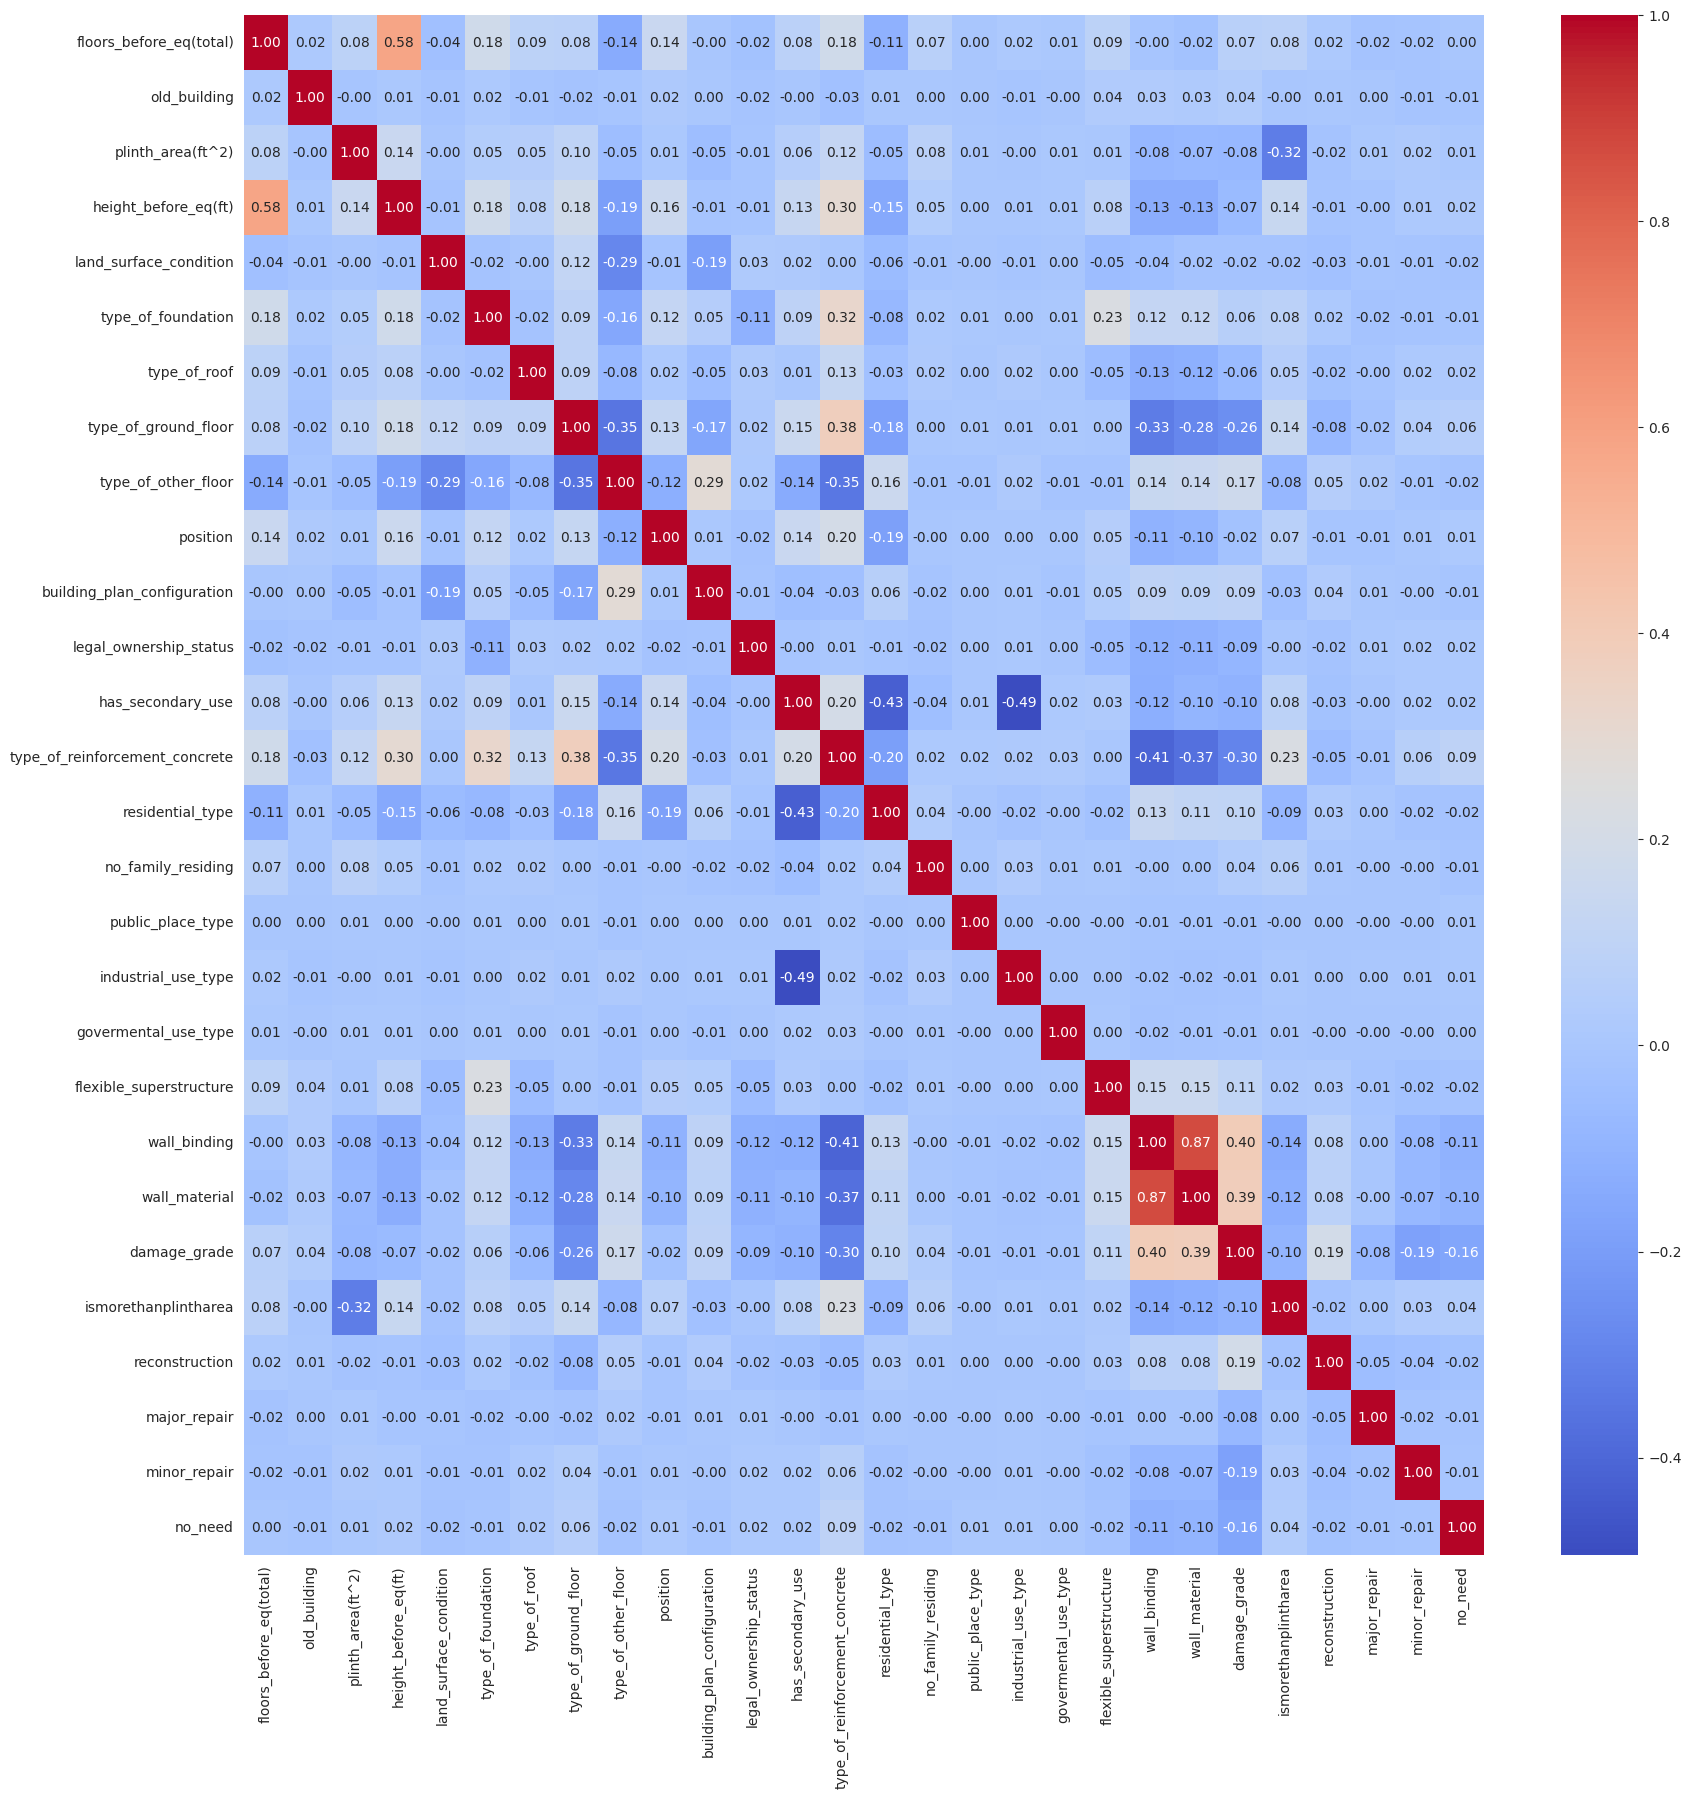

In [ ]:
# Plot heatmap to see correlation between columns
plt.figure(figsize=(20, 20))
sns.heatmap(eda_for_missing_val.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

In [ ]:
cols = eda_for_missing_val.describe(include='all').transpose()
cols['mode'] = eda_for_missing_val.mode().iloc[0]
cols['median'] = eda_for_missing_val.median()

cols

,count,mean,std,min,25%,50%,75%,max,mode,median
floors_before_eq(total),284351.0,2.292529,0.503423,1.0,2.0,2.0,3.0,9.0,2.0,2.0
old_building,303788.0,25.981662,67.994088,0.0,10.0,18.0,29.0,999.0,15.0,18.0
plinth_area(ft^2),248529.0,382.872639,165.397354,0.0,280.0,357.0,456.0,1000.0,300.0,357.0
height_before_eq(ft),284351.0,17.321342,5.059263,6.0,14.0,16.0,20.0,99.0,18.0,16.0
land_surface_condition,303788.0,0.310592,0.698090,0.0,0.0,0.0,0.0,3.0,0.0,0.0
type_of_foundation,303788.0,2.536680,1.075239,0.0,2.0,3.0,3.0,5.0,3.0,3.0
type_of_roof,303788.0,1.834852,1.241469,0.0,1.0,1.0,2.0,4.0,1.0,1.0
type_of_ground_floor,303788.0,1.445133,1.087710,0.0,1.0,1.0,2.0,6.0,1.0,1.0
type_of_other_floor,303788.0,2.064278,0.617798,0.0,2.0,2.0,2.0,3.0,2.0,2.0
position,289804.0,0.261501,0.528999,0.0,0.0,0.0,0.0,3.0,0.0,0.0


## Fill using manual imputer of mode groupby

In [ ]:
# Fill missing values with mode

train_data['residential_type'].\
    fillna(train_data.groupby(['legal_ownership_status', 'no_family_residing', 
                               'public_place_type', 'plinth_area(ft^2)', 'floors_before_eq(total)'])\
                                ['residential_type'].agg(lambda x : pd.Series.mode(x)[0]).reset_index()['residential_type'], inplace=True)

In [ ]:
def fill_na_using_mode_categorical(df,col,groupby_cols=[]):
    df[col].fillna(df.groupby(groupby_cols)[col].agg(lambda x : pd.Series.mode(x)[0]).reset_index()[col], inplace=True)
    return df

In [ ]:
print("Missing values in each column: \n\n")
df = pd.DataFrame(train_data.isnull().sum(), columns=['Missing values'])
df['percentage'] = (df['Missing values'] / train_data.shape[0] * 100).round(2)
df

Missing values in each column: 




,Missing values,percentage
floors_before_eq(total),19437,6.40
old_building,0,0.00
plinth_area(ft^2),55259,18.19
height_before_eq(ft),19437,6.40
land_surface_condition,11147,3.67
type_of_foundation,0,0.00
type_of_roof,55259,18.19
type_of_ground_floor,19437,6.40
type_of_other_floor,11147,3.67
position,13984,4.60
